In [46]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from PIL import Image

from torch.utils.data import DataLoader
from load_data import FacesDataset
import json
from display_functions import *
from GBP import GuidedBackpropModel  

import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There are 128 images in the batch


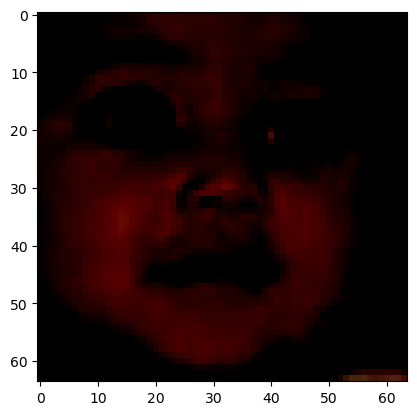

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


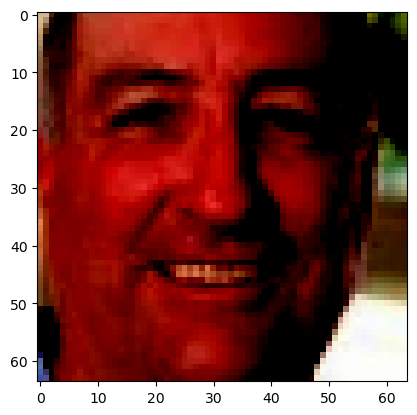

In [47]:
## Display a sample young old pair (note they are in no way related)

display_young_old_(batch_idx = 0, sample_idx = 7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


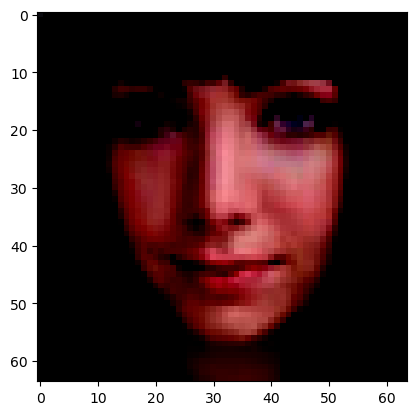

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GPU unavailable, using CPU instead


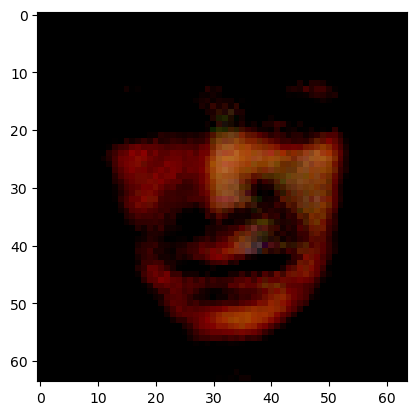

In [48]:
model = torch.load('models/conditional_gan_gen_epoch199expconditional_baseline', map_location=torch.device('cpu'))
model.eval()
sample_young = generate_sample_image(0, 10)
plt.imshow(sample_young.permute(1, 2, 0))
plt.show()

sample_young = sample_young[np.newaxis,:]

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    print("GPU unavailable, using CPU instead")
    device = torch.device("cpu")

output = model(device, sample_young)
output = output.detach().cpu().numpy()
output = np.squeeze(output) 
output = np.transpose(output, (1, 2, 0))

plt.imshow(output)
plt.show()



In [84]:
### GUIDED BACKPROP
guided_backprop = GuidedBackpropModel(model)
guided_gradients = guided_backprop(device, sample_young)


input in __call__:  torch.Size([1, 3, 64, 64])
input in forward:  torch.Size([1, 3, 64, 64])
output shape:  torch.Size([1, 3, 64, 64])
index:  1632
grad output shape:  torch.Size([12288])
grad output shape post reshaping:  torch.Size([1, 3, 64, 64])
gbp type:  <class 'torch.Tensor'>


In [85]:
def normalize(img):
    maxi = img.max()
    mini = img.min()
    return (img - mini)/(maxi-mini)

def hist_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # Use linear interpolation of cdf to find new pixel values
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    equalized_image = equalized_image.reshape(image.shape)
    return equalized_image

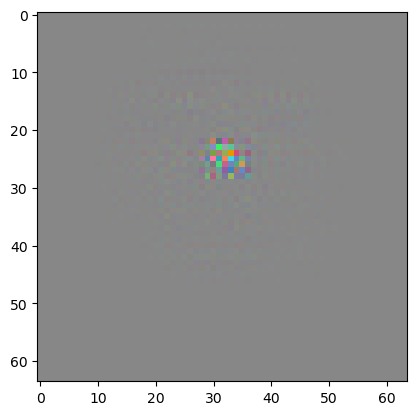

In [86]:
guided_gradients = np.squeeze(guided_gradients)
guided_gradients = normalize(guided_gradients)
guided_gradients = np.transpose(guided_gradients, (1, 2, 0))
#guided_gradients = hist_equalization(guided_gradients)


plt.imshow(guided_gradients)
plt.show()

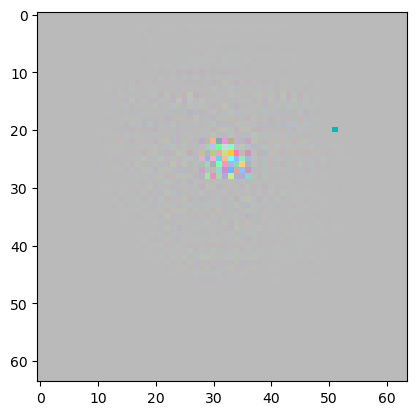

In [88]:
accentuated_image = np.copy(guided_gradients)
accentuated_image[accentuated_image != 0.5315] += 0.2  # Adjust the factor as needed
accentuated_image[accentuated_image == 0.5315] = 0  # Adjust the factor as needed


# Clip values to ensure they are within [0, 1] range
accentuated_image = np.clip(accentuated_image, 0, 1)
plt.imshow(accentuated_image)
plt.show()

In [90]:
accentuated_image = np.copy(accentuated_image)
accentuated_image[accentuated_image != 0.7315184] += 0.1  # Adjust the factor as needed
accentuated_image[accentuated_image == 0.7315184] = 0  # Adjust the factor as needed


# Clip values to ensure they are within [0, 1] range
accentuated_image = np.clip(accentuated_image, 0, 1)

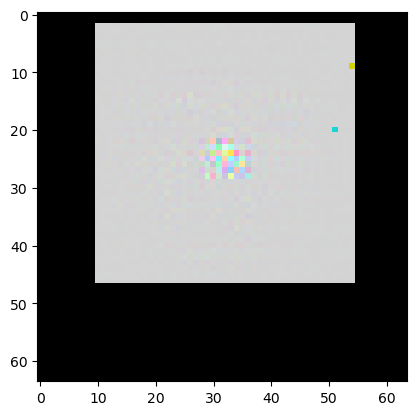

In [91]:
plt.imshow(accentuated_image)
plt.show()